# Loss Experiment

**Idea:** see how loss changes with respect to independent variables for ground truth, entropy, and EGCI

### Imports and Data Loading

50it [00:07,  6.85it/s]


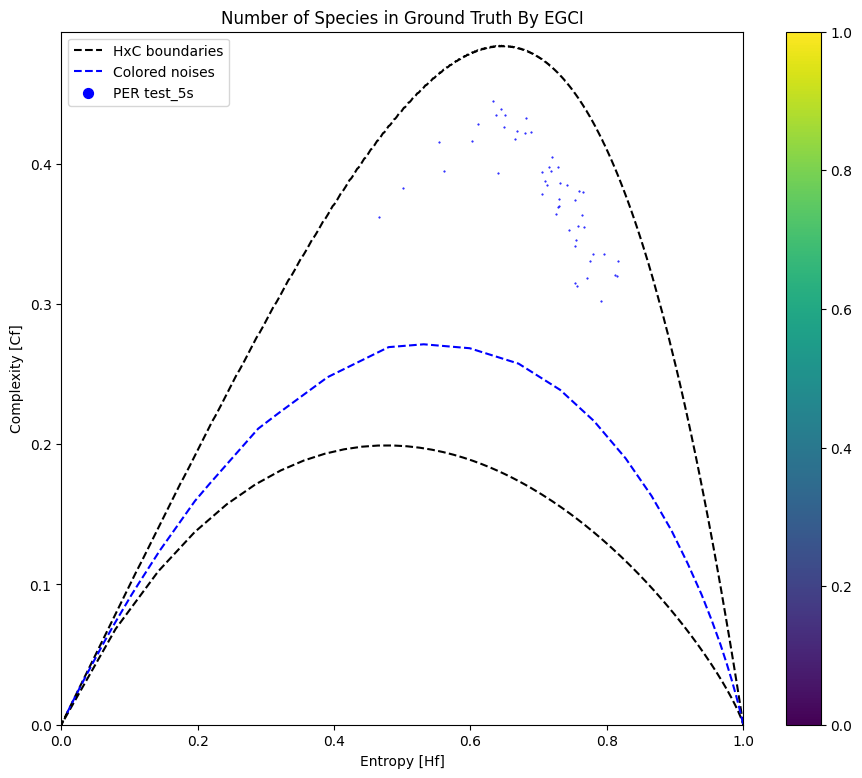

In [6]:
import statsmodels.api as sm
import pandas as pd

from utils import calc_plot_EGCI, plot_ols_plane

fig, out, (h, c, preds, losses, labels), indx = calc_plot_EGCI(indx=50, region="PER")

df = pd.DataFrame({"Entropy": h, "Complexity": c, "Loss": losses, "GT": labels, "Predictions": preds})

### **Test 1:** Regression of Losses on von Neumann Entropy and EGCI

In [ ]:
# df = pd.read_csv(f"PCE_SNE.csv")
X = sm.add_constant(df[['Entropy', 'Complexity']])
model = sm.OLS(df['Loss'], X).fit()

# Plot


plot_ols_plane(df, model, x_col='Entropy', y_col='Complexity', z_col='Loss')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Loss   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.308
Date:                Wed, 16 Jul 2025   Prob (F-statistic):              0.280
Time:                        14:41:02   Log-Likelihood:                 52.084
No. Observations:                  50   AIC:                            -98.17
Df Residuals:                      47   BIC:                            -92.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3968      0.269      1.474      0.1

### **Test 2:** Regression of Losses on von Neumann Entropy and EGCI, with factoring by ground truth

In [ ]:
# missing pce csv? @Sean1572
X = sm.add_constant(df[['Entropy', 'Complexity', 'GT']])
model = sm.OLS(df['Loss'], X).fit()

# Plot
plot_ols_plane(df, model, x_col='Entropy', y_col='Complexity', z_col='Loss')
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).